A1. Research question:
Can we predict the tenure of a customer using following independent variables?

A2. Objectives and goals:
The objective is to predict a customers tenure. The goal is for the company to use this data to keep the customers tenure longer. This will benefit the company by dicovering which areas of the data that causes for short tenure.

B1. 
The assumption for multiple regression is that there is a linear relationship between the outcome variable and the independent variables, (statisticssolutions, 2021). It assumes multivariate normality. It also assumes that independent variables are not highly correlated with each other, (statisticssolutions, 2021). 

B2.
I will be using python which is a widely used by many and is powerful when packages are applied. the jupyter notebook simplistic and easy to use. It is works great with github which I can quickly save and work on multiple computers.  

B3.
The target variable tenure is a continuous variable therefore multiple regression is the appropriate technique to analyze. Also there could be a possiblity that multiple variables are used to predict the target variable.

C1.
-scale numeric features 
-turn qualitative features into numeric features that can be used in the regression using the get_dummies function
-remove missing data
-removing irrelevent features
-rename variable names

C2.
The dataset consists of 50 variables and 10,000 rows, 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod' were dropped and not necessary for use to answer the research question.
The summary statistic displays the count, mean, standard deviation, min, max, and the interquartile ranges. The target variable 'Tenure' averaged around 34.5 months for a customer, with a min of 1 month and a max of 72 months. There were 33 varibles used as predictor variables.


The histograms no extreme abnormalities, although the boxplots displayed some outliers I believe that it will not make significant impact to the model as we see a strong correlation between tenure and bandwidth_gb_peryear in the scatterplot.

the continuous predictor variables: Children, income, outage_sec_perweek, email, contacts, yearly_equip_failure, tenure, monthlycharge, bandwidth_gb_year

the categorical predictor variables include nominal and binary: churn, techie, contract, port_modem, tablet, internetservice, phone, multiple, onlinesecuritym onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies

discrete ordinal predictor variables are the survey responses collected from customers on customer services, it is ordinal due to the rating scales of 1 to 8. these variables include: item1, item2, item3, item4, item5, item6, item7, item8


C3.
import dataset into dataframe
check variables for any corrections need such as improper naming and title
check data type
drop less meaningful variables
check for outliers and impute missing data
run summary statistics
create dummy variables for categorical variables to numerical values
look over univariate and bivariate visualizaitons
move target variable to the end of dataframe
set prepared dataset into a new dataframe for running regression

In [1]:
#import libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

import sklearn 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df = pd.read_csv('churn_clean.csv')
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [3]:
df.rename(columns={'Item1':'TimelyResponse','Item2':'Fixes','Item3':'Replacements','Item4':'Reliability','Item5':'Options','Item6':'Respecfulness','Item7':'Courteous','Item8':'Listening'}, inplace=True)

In [4]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respecfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respecfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
df=df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
                            'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 
                            'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])

In [7]:
df.isnull().sum()

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
Fixes                   0
Replacements            0
Reliability             0
Options                 0
Respecfulness           0
Courteous               0
Listening               0
dtype: int64

In [8]:
df

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respecfulness,Courteous,Listening
0,0,68,28561.99,Male,No,7.978323,10,0,1,No,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,Male,No,9.415935,12,2,0,No,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,4,48,34129.34,Male,No,6.740547,15,2,0,No,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,1,48,45983.43,Female,No,6.590911,10,0,0,No,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,1,39,16667.58,Male,No,12.071910,14,1,0,No,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [9]:
df=pd.get_dummies(df)

In [10]:
df

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,...,1,0,1,0,1,0,0,1,0,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,...,1,0,1,0,0,1,0,1,0,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,...,1,0,1,0,1,0,0,1,0,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,...,1,0,1,0,0,1,1,0,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601,...,0,1,1,0,1,0,1,0,1,0
9996,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810,...,0,1,1,0,0,1,1,0,1,0
9997,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799,...,1,0,1,0,1,0,1,0,0,1
9998,1,39,16667.58,12.071910,14,1,0,71.095600,252.624000,6468.456752,...,1,0,0,1,0,1,0,1,0,1


In [11]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.561400,0.438600,0.625000,0.375000,0.507100,0.492900,0.511000,0.489000,0.411800,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.496241,0.496241,0.484147,0.484147,0.499975,0.499975,0.499904,0.499904,0.492184,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening', 'Gender_Female',
       'Gender_Male', 'Gender_Nonbinary', 'Churn_No', 'Churn_Yes', 'Techie_No',
       'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
       'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'Paper

In [13]:
df=df.drop(columns=['Gender_Female','Gender_Nonbinary', 'Churn_No', 'Techie_No','Contract_Month-to-month', 'Contract_One year','Port_modem_No', 'Tablet_No','InternetService_DSL','InternetService_None','Phone_No','Multiple_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No','PaperlessBilling_No'])
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,InternetService_Fiber Optic,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.440800,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.496508,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening', 'Gender_Male', 'Churn_Yes',
       'Techie_Yes', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes'],
      dtype='object')

In [15]:
df =df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure','MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening', 'Gender_Male', 'Churn_Yes',
       'Techie_Yes', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Tenure',]]

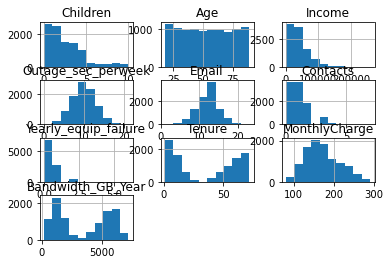

In [16]:
#Univariate Statistics
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 
          'Bandwidth_GB_Year']].hist()
plt.show()

<AxesSubplot:xlabel='Tenure'>

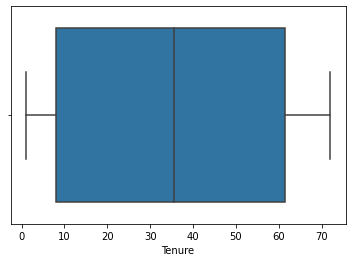

In [17]:
sns.boxplot('Tenure', data=df)

<AxesSubplot:xlabel='MonthlyCharge'>

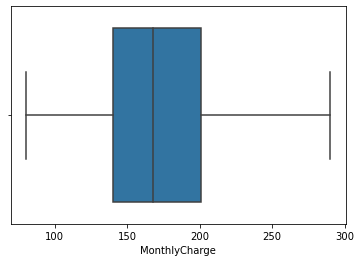

In [18]:
sns.boxplot('MonthlyCharge', data=df)

<AxesSubplot:xlabel='Bandwidth_GB_Year'>

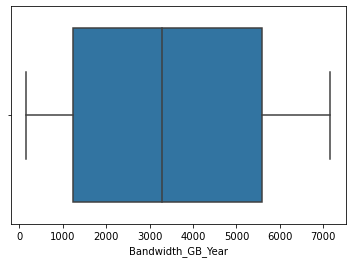

In [19]:
sns.boxplot('Bandwidth_GB_Year', data=df)

<AxesSubplot:xlabel='Outage_sec_perweek'>

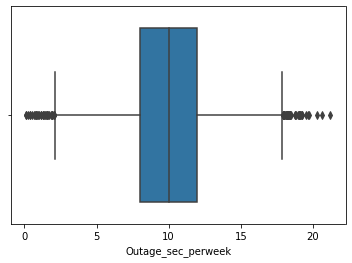

In [20]:
sns.boxplot('Outage_sec_perweek', data=df)

<AxesSubplot:xlabel='Children'>

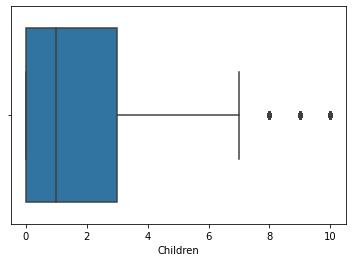

In [21]:
sns.boxplot('Children', data=df)

<AxesSubplot:xlabel='Income'>

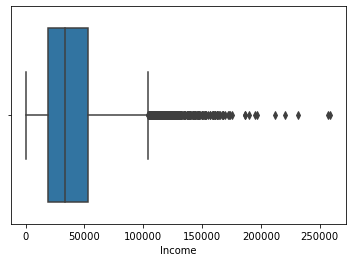

In [22]:
sns.boxplot('Income', data=df)

<AxesSubplot:xlabel='Yearly_equip_failure'>

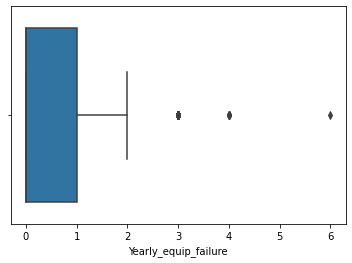

In [23]:
sns.boxplot('Yearly_equip_failure', data=df)

<AxesSubplot:xlabel='Email'>

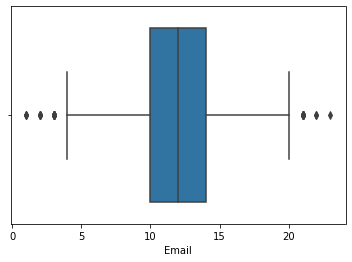

In [24]:
sns.boxplot('Email', data=df)

<AxesSubplot:xlabel='Contacts'>

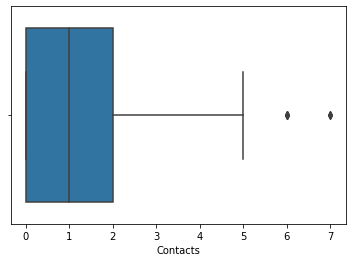

In [25]:
sns.boxplot('Contacts', data=df)

<AxesSubplot:xlabel='Age'>

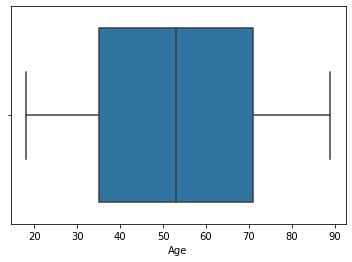

In [26]:
sns.boxplot('Age', data=df)

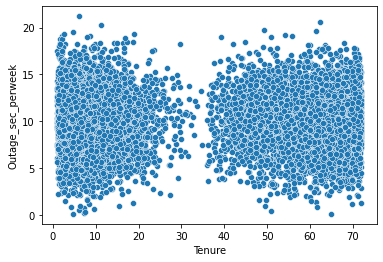

In [27]:
#Bivariate stats
sns.scatterplot(x=df['Tenure'],y=df['Outage_sec_perweek'])
plt.show()

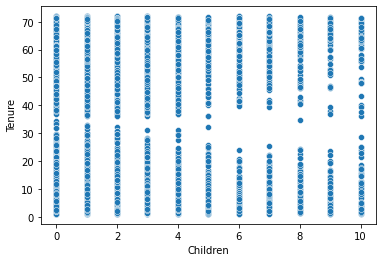

In [28]:
#Bivariate stats
sns.scatterplot(x=df['Children'],y=df['Tenure'])
plt.show()

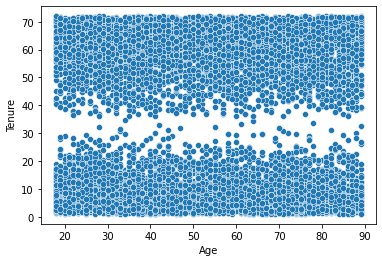

In [29]:
sns.scatterplot(x=df['Age'],y=df['Tenure'])
plt.show()

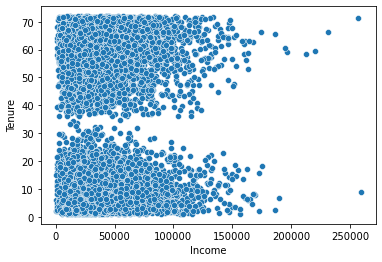

In [30]:
sns.scatterplot(x=df['Income'],y=df['Tenure'])
plt.show()

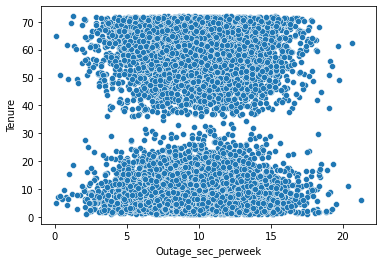

In [31]:
sns.scatterplot(x=df['Outage_sec_perweek'],y=df['Tenure'])
plt.show()

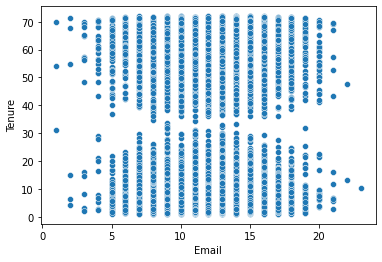

In [32]:
sns.scatterplot(x=df['Email'],y=df['Tenure'])
plt.show()

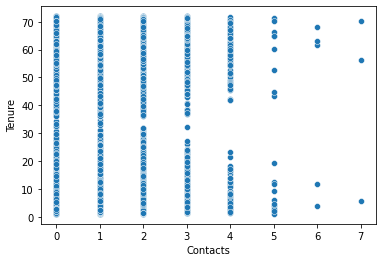

In [33]:
sns.scatterplot(x=df['Contacts'],y=df['Tenure'])
plt.show()

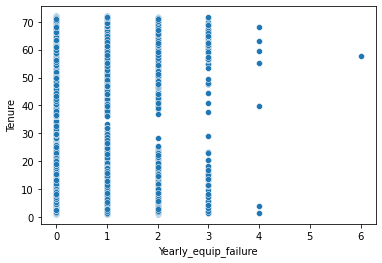

In [34]:
sns.scatterplot(x=df['Yearly_equip_failure'],y=df['Tenure'])
plt.show()

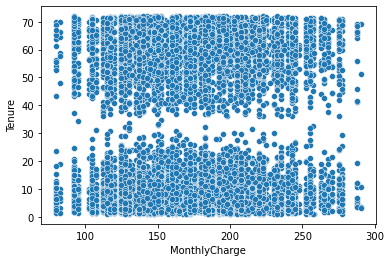

In [35]:
sns.scatterplot(x=df['MonthlyCharge'],y=df['Tenure'])
plt.show()

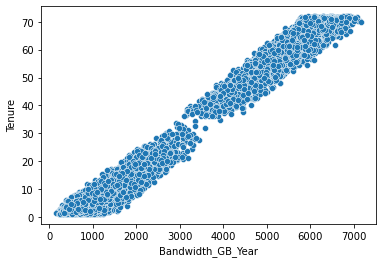

In [36]:
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=df['Tenure'])
plt.show()

C5. 

In [37]:
df.to_csv('df_prepared.csv')

In [38]:
df_prepared= pd.read_csv('df_prepared.csv')

In [39]:
df.shape

(10000, 34)

D1.

In [40]:
df['intercept']=1
lm_tenure = sm.OLS(df['Tenure'], df[['Children', 'Age', 'Income', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening','intercept']]).fit()
print(lm_tenure.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 5.306e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:11:16   Log-Likelihood:                -24365.
No. Observations:               10000   AIC:                         4.877e+04
Df Residuals:                    9982   BIC:                         4.890e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.3736 

In [41]:
df['intercept']=1
lm_tenure = sm.OLS(df['Tenure'], df[['Children', 'Age', 'Income', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening', 'Gender_Male', 'Churn_Yes',
       'Techie_Yes', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes','intercept']]).fit()
print(lm_tenure.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 9.740e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:11:17   Log-Likelihood:                -18043.
No. Observations:               10000   AIC:                         3.615e+04
Df Residuals:                    9966   BIC:                         3.640e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

D2.

<AxesSubplot:>

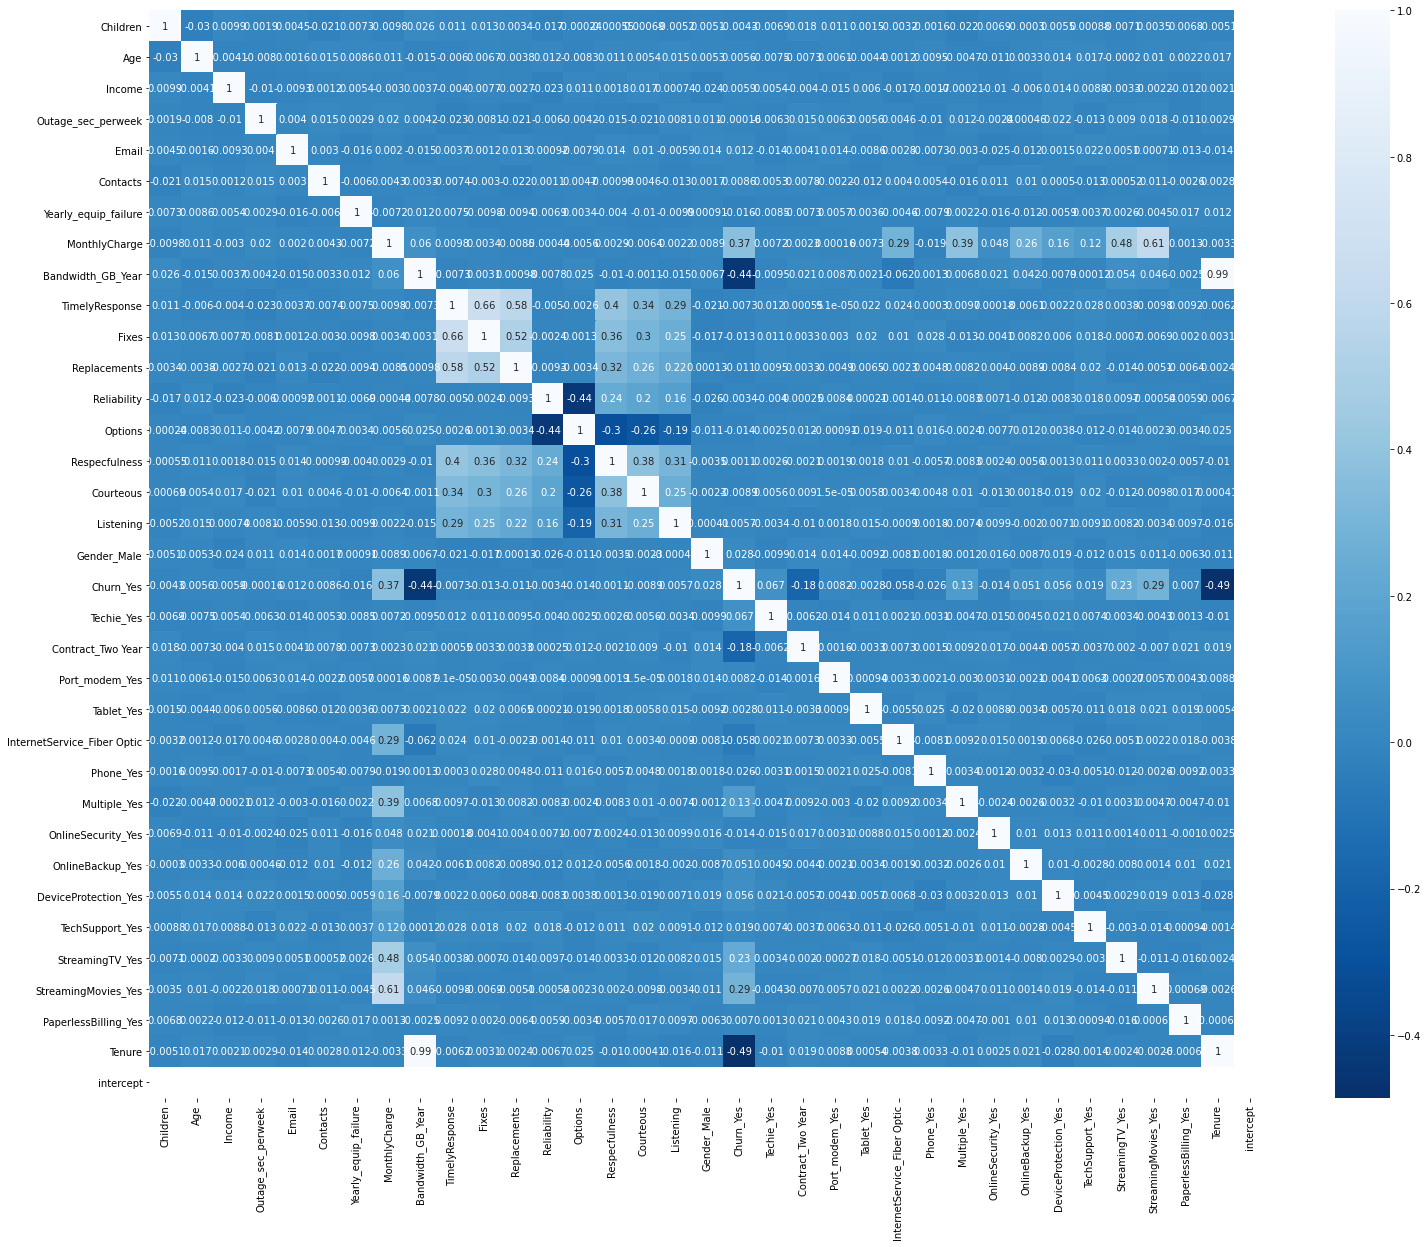

In [42]:

corr = df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr, cmap='Blues_r', annot=True)

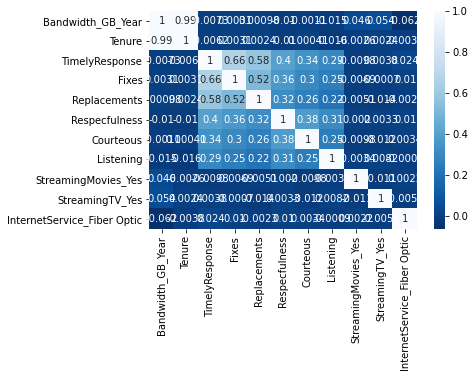

<Figure size 2880x2880 with 0 Axes>

In [43]:
churn_corr = df[['Bandwidth_GB_Year', 'Tenure', 'TimelyResponse', 'Fixes', 'Replacements', 'Respecfulness', 'Courteous', 'Listening','StreamingMovies_Yes', 'StreamingTV_Yes', 'InternetService_Fiber Optic']]

sns.heatmap(churn_corr.corr(), cmap='Blues_r', annot=True)
plt.figure(figsize=(40,40))
plt.show()

In [44]:
observations = len(df)
variables = df.columns[:-1]
X = df.iloc[:,:-1] 
y = df['Tenure'].values

In [45]:
X = df.iloc[:,:-1]
correlation_matrix = X.corr()
print (correlation_matrix)

                             Children       Age    Income  Outage_sec_perweek  \
Children                     1.000000 -0.029732  0.009942            0.001889   
Age                         -0.029732  1.000000 -0.004091           -0.008047   
Income                       0.009942 -0.004091  1.000000           -0.010011   
Outage_sec_perweek           0.001889 -0.008047 -0.010011            1.000000   
Email                        0.004479  0.001588 -0.009267            0.003994   
Contacts                    -0.020776  0.015068  0.001233            0.015092   
Yearly_equip_failure         0.007321  0.008577  0.005423            0.002909   
MonthlyCharge               -0.009781  0.010729 -0.003014            0.020496   
Bandwidth_GB_Year            0.025585 -0.014724  0.003674            0.004176   
TimelyResponse               0.011470 -0.005972 -0.004009           -0.023338   
Fixes                        0.013146  0.006659  0.007718           -0.008076   
Replacements                

Justification of model reduction.

From the correlation model it clearly shows that Bandwidth has a strong relationship with Tenure making it a strong predictor variable. MonthlyCharge, and Replacements will be used in this reduced model due to showing higher than usual correlations in the heatmap. InternetService had one of the higher coefficient values in the first regression so it will be selected. 

D3.

In [46]:
df['intercept'] = 1
lm_Tenure_reduced = sm.OLS(df['Tenure'], df[['InternetService_Fiber Optic', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Replacements', 'intercept']]).fit()
print(lm_Tenure_reduced.summary())


                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.771e+05
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:11:26   Log-Likelihood:                -21822.
No. Observations:               10000   AIC:                         4.365e+04
Df Residuals:                    9995   BIC:                         4.369e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
InternetService_Fi

Reduced Regression model
y = 0.6940 + 4.4423(InternetService_Fiber Optic) + 0.0121(Bandwidth_GB_Year) - 0.0540(MonthlyCharge) + 0.0210(Replacements)

E1.

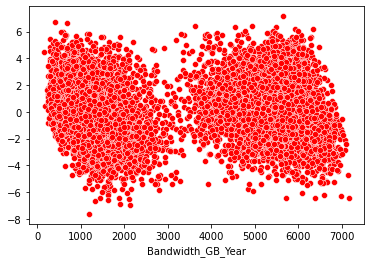

In [47]:

df['intercept'] = 1
residuals =df['Tenure'] - lm_Tenure_reduced.predict(df[['InternetService_Fiber Optic', 'Bandwidth_GB_Year', 'MonthlyCharge', 'Replacements','intercept']])
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=residuals,color='red')
plt.show();

E2. Calculation and code above
E3. Code above

F1.
The regression equation for the reduced model:
y = 0.6940 + 4.4423(InternetService_Fiber Optic) + 0.0121(Bandwidth_GB_Year) - 0.0540(MonthlyCharge) + 0.0210(Replacements)
from this model:
    for every 1 unit for Internet_Fiber Optic, Tenure will increase by 4.4423
    for every 1 of Bandwidth_GB_Year, Tenure will increase by 0.0121 
    for every 1 of MonthlyCharge, Tenure will decrease by 0.0540
    for every 1 of Replacements, Tenure will increase by 0.0210
The P-values for InternetService_Fiber Optic, BandWidth_GB_Year, and MonthlyCharge were zero meaning that they are statistically significant, Replacements however show a p-value of .314 which is greater than the significant level of 0.05 meaning that it is not statistically significant.

The limitations of this analysis is that the timeframe of this data set is too short, and not enough data is collected to properly display a strong correlation.

F2.
With the strong correlation between Tenure and Bandwidth_GB_Year it is important that in order to retain customers have a longer Tenure. The company must do what can to have customer continually increase their bandwidth, wheather marketing them to subscribe to more services, and providing quality customer service that will prevent them of lowering bandwith usage such as outages and repairs. Also from the regression MonthlyCharge shows to decrease tenure, the company must find a ceiling to maximize revenue while retaining customers. 

G. Video


In [ ]:
H. Third party sources
Python pandas - get_dummies() method. GeeksforGeeks. (2020, October 13). Retrieved September 25, 2021, from https://www.geeksforgeeks.org/python-pandas-get_dummies-method/. 

In [ ]:
I. Sources

Assumptions of multiple linear regression. Statistics Solutions. (2021, August 11). Retrieved September 25, 2021, from https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-multiple-linear-regression/. 